<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head(30)


--2025-07-11 18:15:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.4MB/s    in 2.4s    

2025-07-11 18:15:10 (62.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [5]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



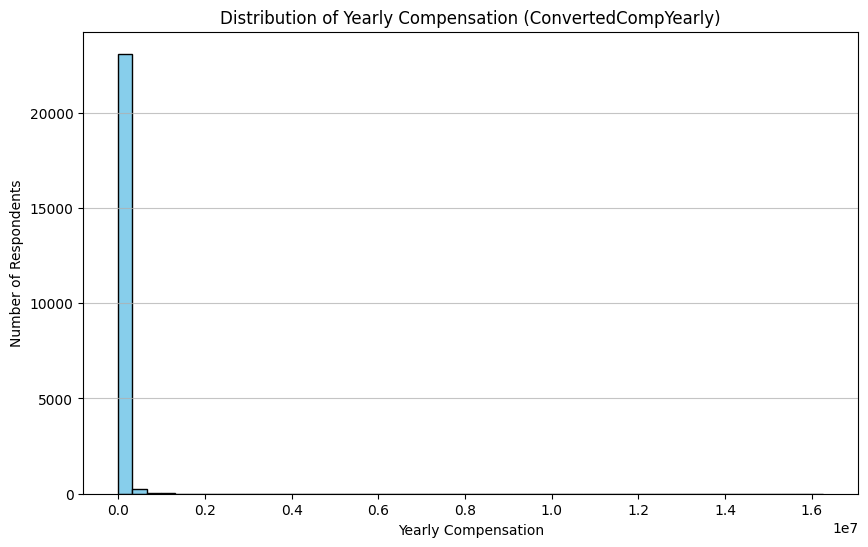

In [6]:
# Filter out null or zero compensation values if needed
comp_data = df['ConvertedCompYearly'].dropna()
comp_data = comp_data[comp_data > 0]  # Optional: remove zero or negative values if any

plt.figure(figsize=(10,6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



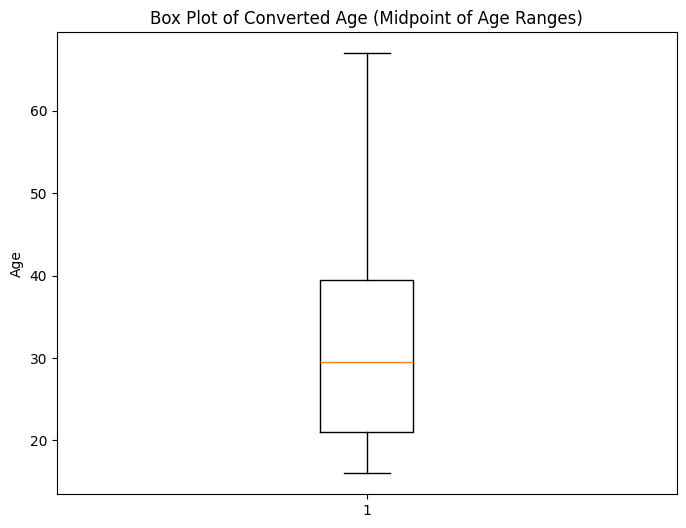

In [8]:
import numpy as np
# Convert age ranges to numeric midpoint
def age_to_midpoint(age_str):
    # Handle special cases like 'Under 18 years' or '65 years or older'
    if pd.isna(age_str):
        return np.nan
    if 'Under' in age_str:
        return 16  # or any number below 18 to represent under 18
    if 'older' in age_str:
        return 67  # or any number to represent 65+
    # Extract the range, e.g. "25-29 years old"
    parts = age_str.split('-')
    if len(parts) == 2:
        try:
            low = int(parts[0])
            high = int(parts[1].split()[0])  # Remove 'years' or 'years old'
            return (low + high) / 2
        except:
            return np.nan
    else:
        return np.nan

# Apply the function to create a new numeric age column
df['AgeMidpoint'] = df['Age'].apply(age_to_midpoint)

# Drop NaN values for plotting
age_numeric = df['AgeMidpoint'].dropna()

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(age_numeric, vert=True)
plt.title('Box Plot of Converted Age (Midpoint of Age Ranges)')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



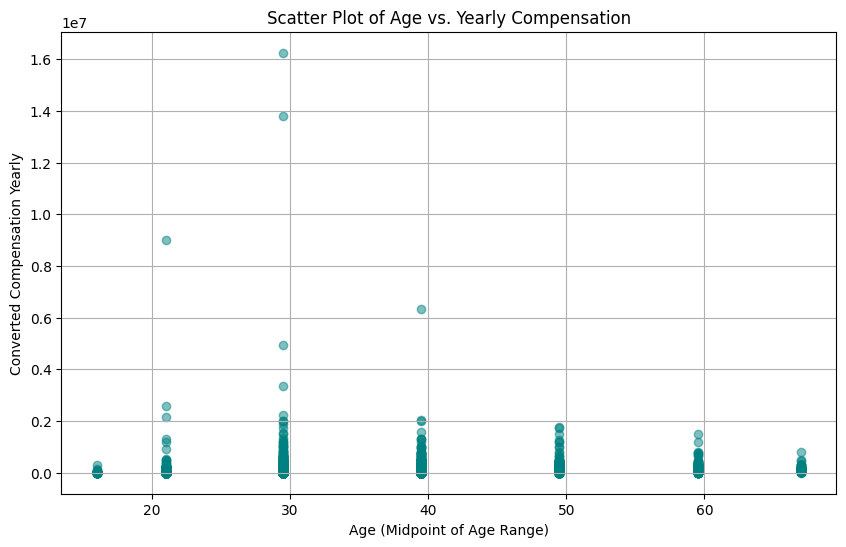

In [9]:
# Drop rows with missing values in AgeMidpoint or ConvertedCompYearly
df_scatter = df.dropna(subset=['AgeMidpoint', 'ConvertedCompYearly'])

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['AgeMidpoint'], df_scatter['ConvertedCompYearly'], alpha=0.5, color='teal')

plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Midpoint of Age Range)')
plt.ylabel('Converted Compensation Yearly')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


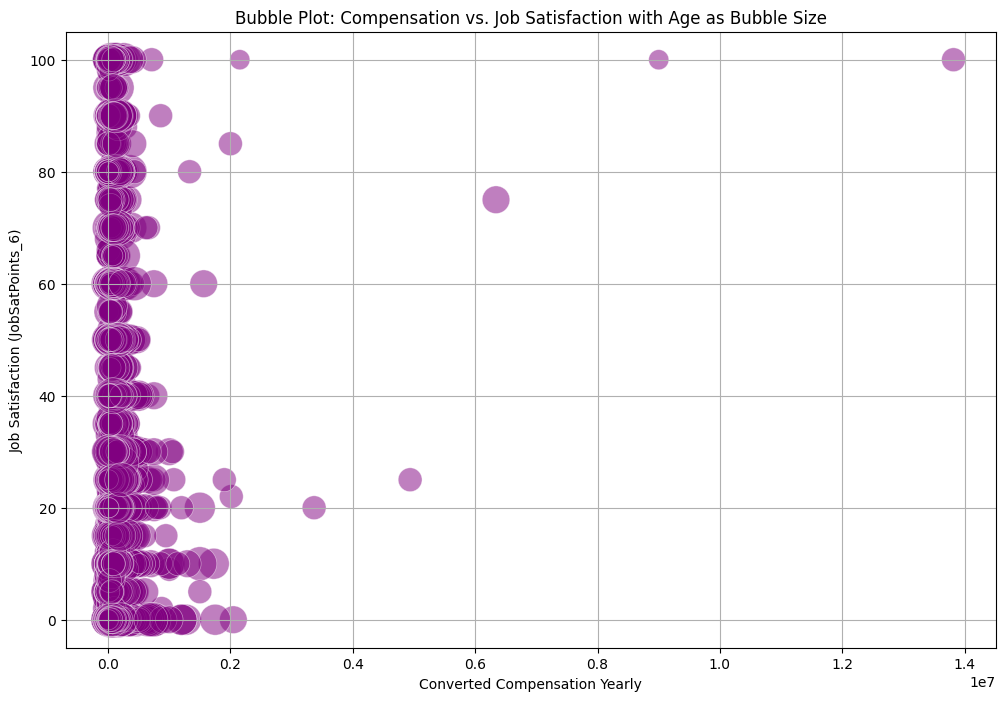

In [10]:
# Make sure relevant columns exist and drop rows with missing data
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeMidpoint'])

plt.figure(figsize=(12, 8))

# Normalize bubble size for better visualization (optional)
sizes = df_bubble['AgeMidpoint'] * 10  # Adjust the multiplier as needed

plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=sizes,
    alpha=0.5,
    color='purple',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)

plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



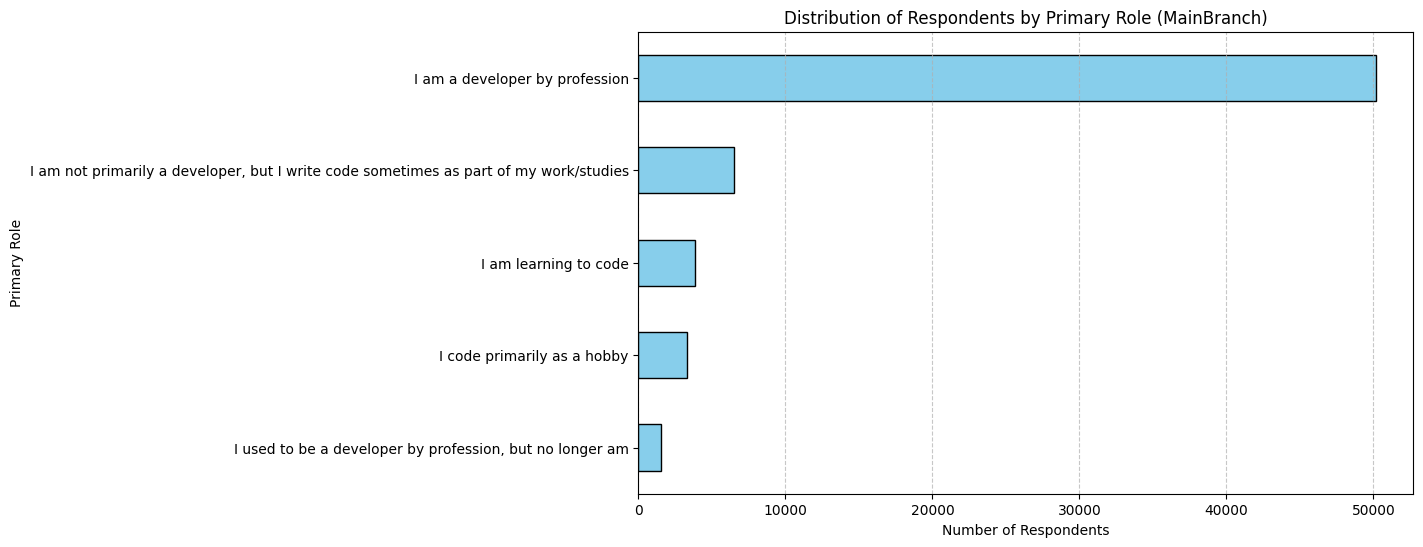

In [11]:
# Count the frequency of each category in MainBranch
main_branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')

plt.gca().invert_yaxis()  # Optional: to show the highest count at top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



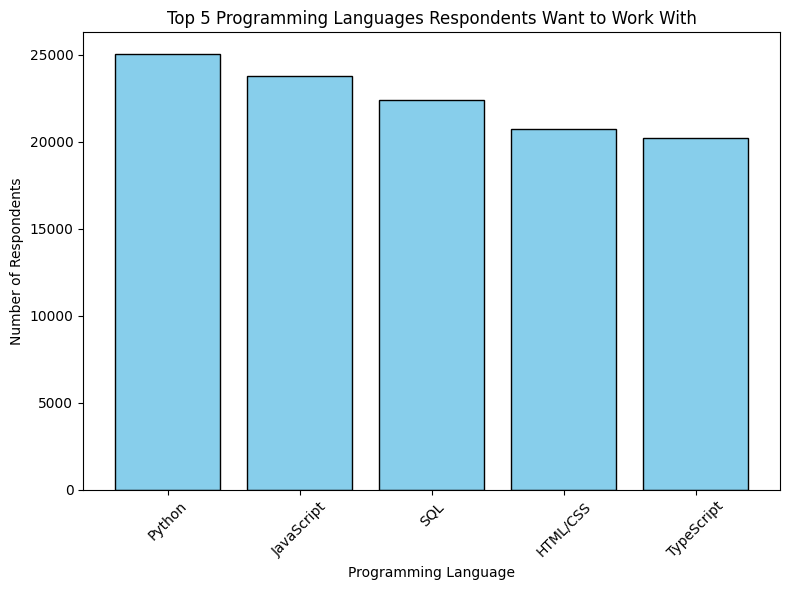

In [13]:
from collections import Counter
# Split the semicolon-separated languages into a flat list
all_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count frequency of each language
language_counts = Counter(all_languages)

# Get top 5 most common languages
top5 = language_counts.most_common(5)
languages, counts = zip(*top5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(languages, counts, color='skyblue', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


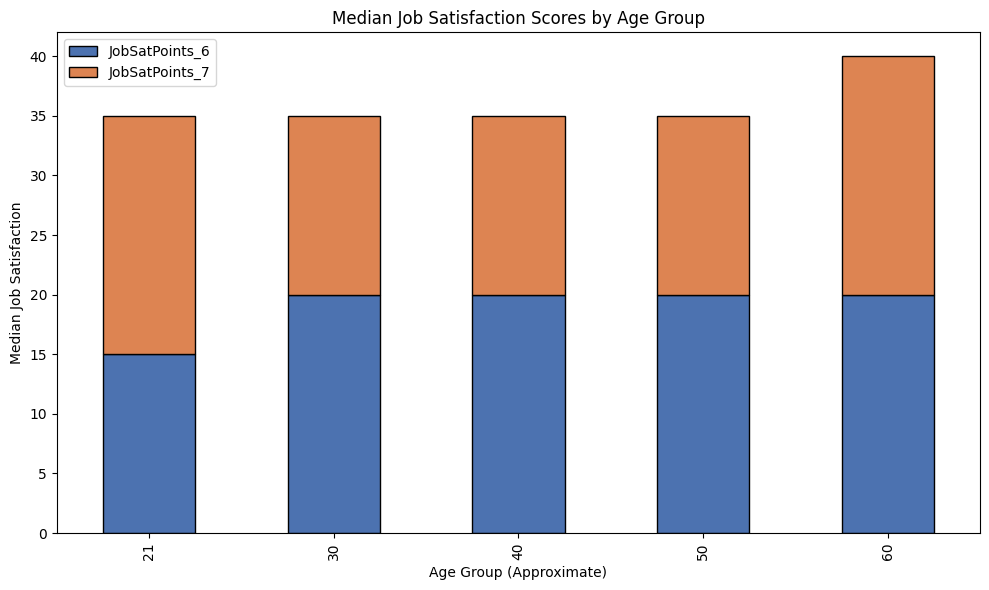

In [14]:
# 1. Create a numeric age column from Age ranges, by extracting the midpoint
def age_to_midpoint(age_str):
    # Example: '30-34 years old' -> 32.0
    try:
        parts = age_str.split('-')
        low = int(parts[0])
        high = int(parts[1].split()[0])  # remove ' years old'
        return (low + high) / 2
    except:
        return np.nan

df['AgeNum'] = df['Age'].apply(age_to_midpoint)

# 2. Filter to keep rows with non-null AgeNum and job satisfaction columns
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6', 'JobSatPoints_7']).copy()

# 3. Create age groups by rounding age midpoint to nearest integer or grouping in bins
df_filtered['AgeGroup'] = df_filtered['AgeNum'].round().astype(int)

# 4. Calculate median JobSatPoints_6 and JobSatPoints_7 for each age group
median_satisfaction = df_filtered.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# 5. Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,6), color=['#4c72b0', '#dd8452'], edgecolor='black')

plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group (Approximate)')
plt.ylabel('Median Job Satisfaction')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



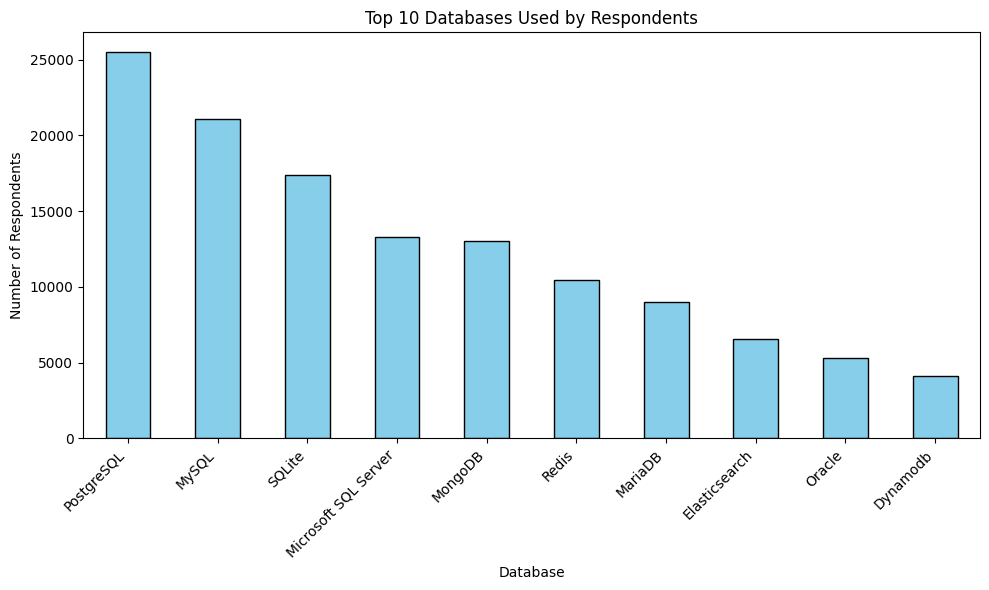

In [15]:
# Step 1: Drop rows with null values in DatabaseHaveWorkedWith
df_clean = df.dropna(subset=['DatabaseHaveWorkedWith']).copy()

# Step 2: Split the semicolon-separated database lists into individual entries
df_clean['DatabaseList'] = df_clean['DatabaseHaveWorkedWith'].str.split(';')

# Step 3: Explode the list so each database is a separate row
db_exploded = df_clean.explode('DatabaseList')

# Step 4: Count occurrences of each database
db_counts = db_exploded['DatabaseList'].value_counts()

# Step 5: Select top N databases to plot (optional)
top_n = 10
top_dbs = db_counts.head(top_n)

# Step 6: Plot the bar chart
plt.figure(figsize=(10,6))
top_dbs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Top {top_n} Databases Used by Respondents')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



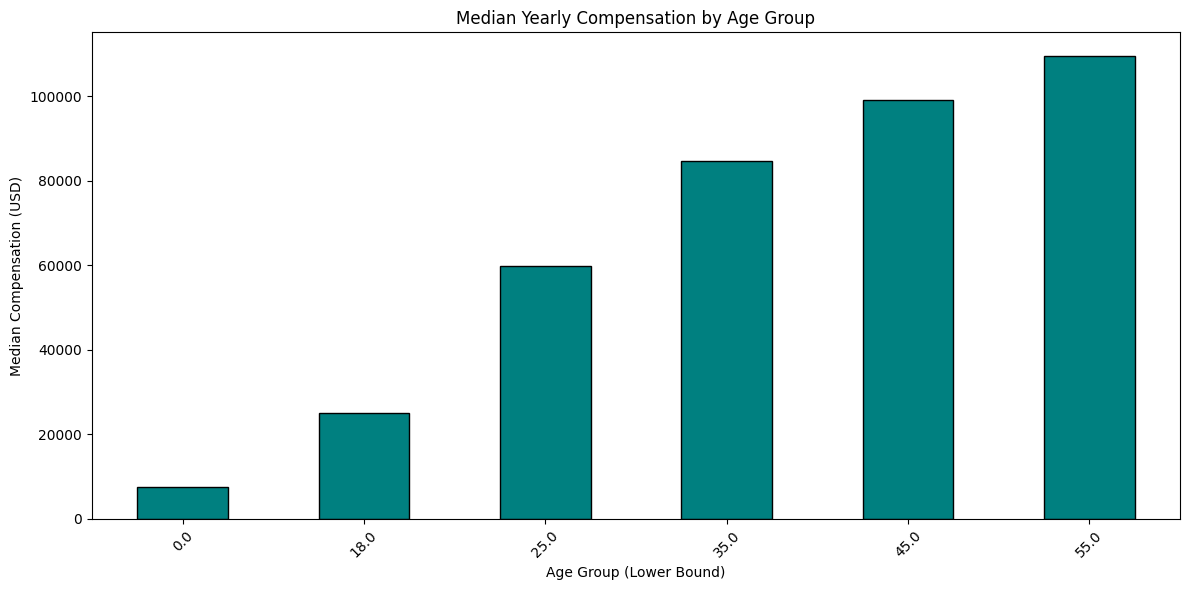

In [16]:
# Step 1: Drop rows with nulls in Age and ConvertedCompYearly
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly']).copy()

# Step 2: Extract lower bound of age range as numeric AgeGroup
def extract_lower_age(age_str):
    # Example age formats: '30-34 years old', '45-49 years old', 'Under 18 years'
    if pd.isna(age_str):
        return np.nan
    if "Under" in age_str:
        return 0  # or assign a small number like 0 for under 18
    if "Over" in age_str:
        # assign a higher number for 'Over 60 years old'
        return 65  
    # Extract lower number in range
    try:
        return int(age_str.split('-')[0])
    except:
        return np.nan

df_filtered['AgeGroup'] = df_filtered['Age'].apply(extract_lower_age)

# Step 3: Filter out any NaN AgeGroups
df_filtered = df_filtered.dropna(subset=['AgeGroup'])

# Step 4: Calculate median compensation by age group
median_comp = df_filtered.groupby('AgeGroup')['ConvertedCompYearly'].median()

# Step 5: Plot grouped bar chart
plt.figure(figsize=(12,6))
median_comp.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group (Lower Bound)')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



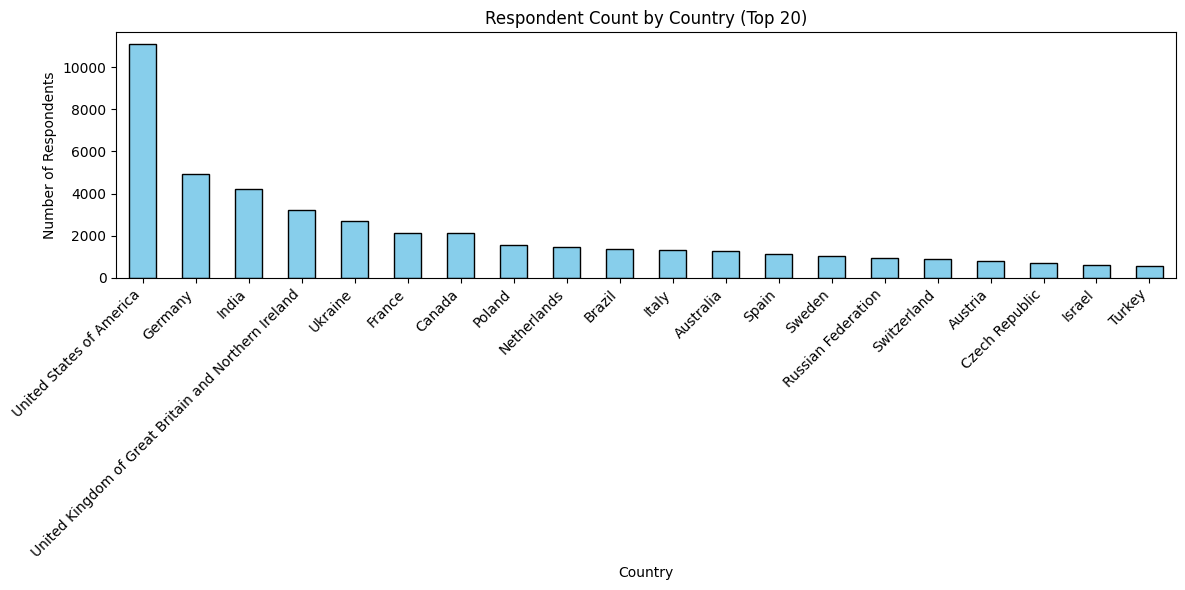

In [17]:
# Step 1: Drop rows with null country values
df_country = df.dropna(subset=['Country']).copy()

# Step 2: Count respondents per country
country_counts = df_country['Country'].value_counts()

# Optional: Select top 20 countries for clarity
top_countries = country_counts.head(20)

# Step 3: Plot bar chart
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Respondent Count by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
